---
 # **E**xploratory **D**ata **A**nalysis
--- ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scripts import calc_outliers, violin_outliers_gender


In [2]:
df = pd.read_csv("assets/cardio_train.csv", sep=";").drop(columns=["id"])
df["age_years"] = df["age"] // 365

print(df.shape)
df.head()

(70000, 13)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


---
Source:
[Kaggle - Cardiovascular Disease](https://www.kaggle.com/code/sulianova/cardiovascular-disease-dataset)
<br><br>
> Features:
<br>

&nbsp;&nbsp;&nbsp;&nbsp;1. **Age** | Objective Feature | **age** | int (days) <br>
&nbsp;&nbsp;&nbsp;&nbsp;2. **Height** | Objective Feature | **height** | int (cm) |<br>
&nbsp;&nbsp;&nbsp;&nbsp;3. **Weight** | Objective Feature | **weight** | float (kg) |<br>
&nbsp;&nbsp;&nbsp;&nbsp;4. **Gender** | Objective Feature | **gender** | categorical code |<br>
&nbsp;&nbsp;&nbsp;&nbsp;5. **Systolic blood pressure** | Examination Feature | **ap_hi** | int |<br>
&nbsp;&nbsp;&nbsp;&nbsp;6. **Diastolic blood pressure** | Examination Feature | **ap_lo** | int |<br>
&nbsp;&nbsp;&nbsp;&nbsp;7. **Cholesterol** | Examination Feature | cholesterol | **1**: normal, **2**: above normal, **3**: well above normal |<br>
&nbsp;&nbsp;&nbsp;&nbsp;8. **Glucose** | Examination Feature | **gluc** | 1: normal, 2: above normal, 3: well above normal |<br>
&nbsp;&nbsp;&nbsp;&nbsp;9. **Smoking** | Subjective Feature | **smoke** | binary |<br>
&nbsp;&nbsp;&nbsp;&nbsp;10. **Alcohol intake** | Subjective Feature | **alco** | binary |<br>
&nbsp;&nbsp;&nbsp;&nbsp;11. **Physical activity** | Subjective Feature | **active** | binary |<br>
&nbsp;&nbsp;&nbsp;&nbsp;12. **Presence or absence of cardiovascular disease** | Target Variable | **cardio** | binary |<br>
<br>

In regards to gender: 1 - women, 2 - men <br>
All of the dataset values were collected at the moment of medical examination. 

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


### 1.1 a)

&nbsp; Q: How many datapoints are positive for cardiovascular disease, and how many are negative?

&nbsp; A: The dataset contains 70 000 records of patients data, 35 021 of those are recorded as negative for cardiovascular disease and 34 979 are recorded as positive for cardiovascular disease.

In [4]:
cardio_counts = df['cardio'].value_counts()
cardio_counts

cardio
0    35021
1    34979
Name: count, dtype: int64

### 1.1 b)

&nbsp; Q: What is the ratio for Cholesterol levels in the dataset?

&nbsp; A:The below ratios for Cholesterol levels in the dataset indicate that the majority of individuals have normal cholesterol levels.

In [5]:
cholesterol_counts = df["cholesterol"].value_counts()
cholesterol_ratios = cholesterol_counts / cholesterol_counts.sum()
cholesterol_ratios

cholesterol
1    0.748357
2    0.136414
3    0.115229
Name: count, dtype: float64

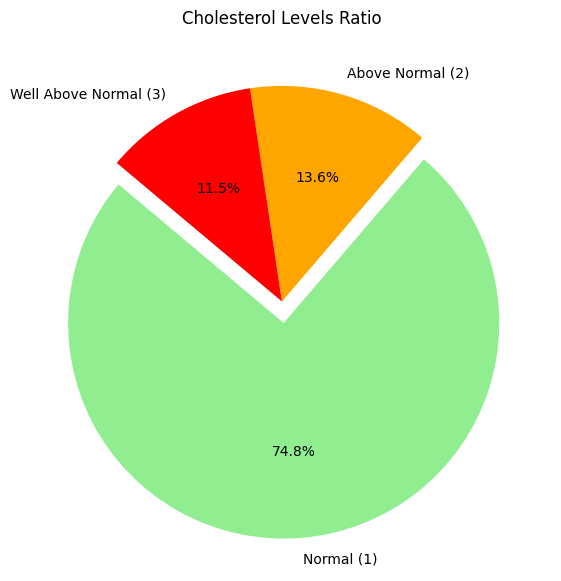

In [6]:
# Pie chart for choilesterol levels
labels = ["Normal (1)", "Above Normal (2)", "Well Above Normal (3)"]
sizes = cholesterol_ratios.values
colors = ["lightgreen", "orange", "red"]
explode = (0.1, 0, 0) # explode 1st slice (Normal)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%" , startangle = 140) # type: ignore
plt.title("Cholesterol Levels Ratio")
plt.show()

### 1.1 c)

&nbsp; Q: What is the age distribution of the dataset?

&nbsp; A: The histogram shown below suggests that the dataset primarily comprises of middle-aged adults, with a gradual decrease in population size among older age groups. This age distribution is crucial for analyzing cardiovascular disease as it is more prevalent in older age groups.

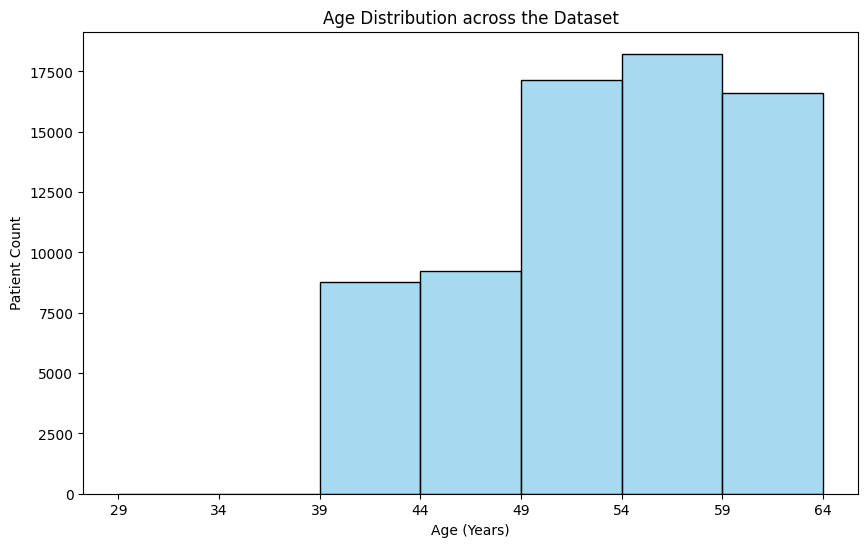

In [7]:

# defining custom bin edges
# sets interval to 5 years from min to max age plus an extra 5 years to include max age
bin_edges = np.arange(start=df['age_years'].min(), stop=df['age_years'].max() + 5, step=5)


# Plotting the Histogram for age distribution

plt.figure(figsize=(10, 6))
sns.histplot(data = df, x='age_years', bins=bin_edges, color='skyblue')
plt.title('Age Distribution across the Dataset')
plt.xlabel('Age (Years)')
plt.ylabel('Patient Count')
plt.xticks(bin_edges)
plt.show()


### 1.1 d) 

&nbsp; Q: What is the ratio of smokers in the dataset?

&nbsp; A: The 8.8% smoker rate, while relatively small, represents a significant subgroup within the dataset. This subgroup is important to consider when analyzing cardiovascular disease as smoking is a significant risk factor.

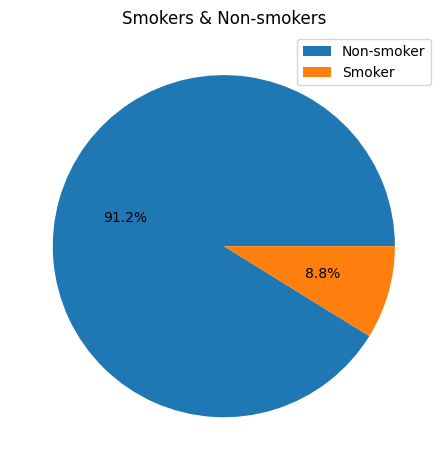

In [8]:
smoker = {"Non-smoker": 0, "Smoker": 1}

fig, ax = plt.subplots()

# create the pie chart from each smoker value (0, 1) in the dataset
plt.pie(x = [len(df[df["smoke"] == i]) for i in smoker.values()], autopct = lambda pct: f"{pct:.1f}%")

# map the labels to the pie chart
plt.legend(smoker.keys())

# set the title
ax.set(title = "Smokers & Non-smokers")

plt.tight_layout()

### Weight and Height Outliers

&nbsp; Q: What are the outliers in the weight and height columns?

&nbsp; A: The weight and height columns contain outliers, which are values that are significantly different from the rest of the dataset. These outliers are likely to be errors in the data collection process and should be removed from the dataset.

Both weight and height will be delt with more in depth in a later section when engineering a feature for BMI. But taking a look at some extreme outliers:

In [9]:
df[df["weight"] == df["weight"].min()] # 10 kg and 165 cm looks invalid

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
57858,18804,2,165,10.0,180,1100,2,2,0,0,1,1,51


In [10]:
df[df["height"] == df["height"].min()] # 55 cm & 81kg looks invalid

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
22723,23386,1,55,81.0,130,90,1,1,0,0,1,1,64


### 1.1 e)

&nbsp; Q: What is the weight distribution of the dataset?

&nbsp; A: The histogram below shows that the dataset is primarily comprised of individuals with a weight between 50 and 100 kg. This distribution is important to consider when analyzing cardiovascular disease as weight is a significant risk factor.

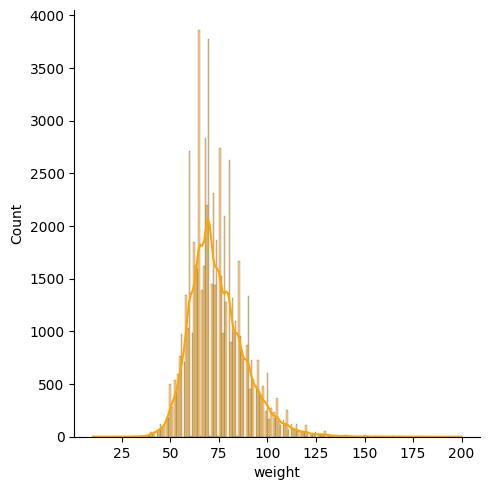

In [11]:
sns.displot(df["weight"], kde=True, color="orange") # type: ignore # kde = kernel density estimation (smooths the histogram)


*Weight distribution shown separately for Genders below:*<br>
Outliers calculated with Tukey's fences method.
It looks like it is cutting off too much from the top end of the distribution aswell as too little from the bottom end of the distribution.

{'Women': (37.5, 105.5), 'Men': (42.5, 110.5)}

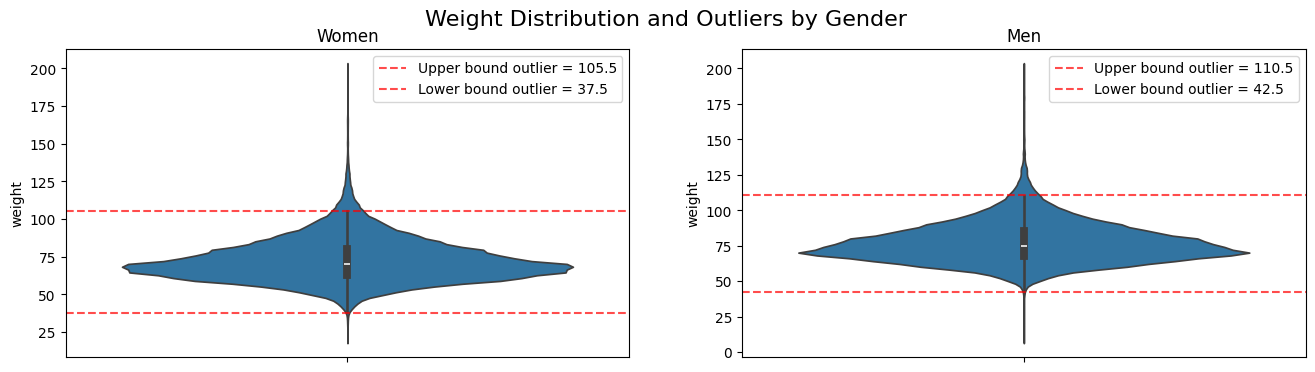

In [12]:
outliers = {"Women": calc_outliers(df[df["gender"] == 1]["weight"]), "Men": calc_outliers(df[df["gender"] == 2]["weight"])}
violin_outliers_gender(outliers, df, "weight")

The below outliers should do a better job of cutting off the extreme outliers.

{'Women': (45, 120), 'Men': (50, 125)}

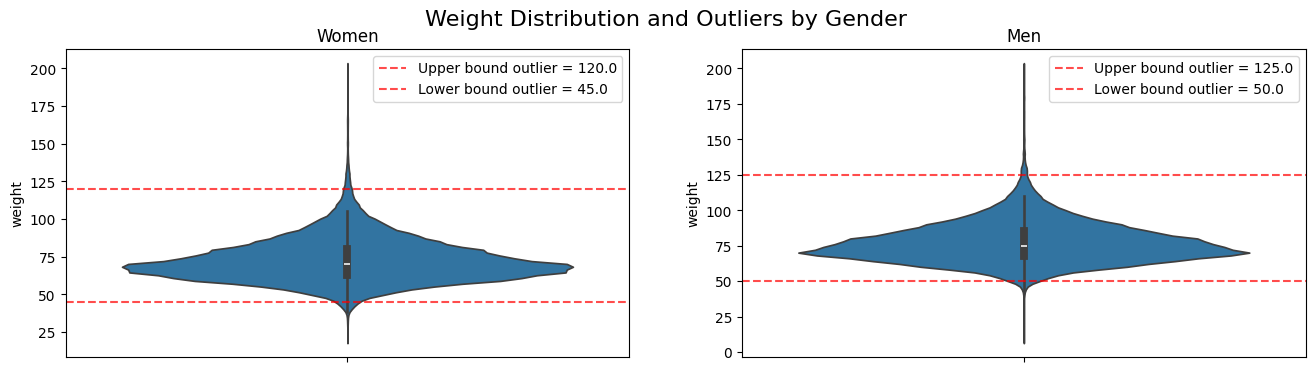

In [13]:
outliers = {"Women": (45, 120), "Men": (50, 125)}
violin_outliers_gender(outliers, df, "weight")

In [14]:
pre = len(df)

# drop the values of women outside outliers
wom = df[(df["gender"] == 1) & ((df["weight"] < 45) | (df["weight"] > 120))].index
df = df.drop(wom, axis = 0) # axis = 0 for rows

# drop the values of men outside outliers
men = df[(df["gender"] == 2) & ((df["weight"] < 50) | (df["weight"] > 125))].index
df.drop(men, axis = 0)

print(f"Dropped {pre - len(df)} rows")

Dropped 570 rows


## 1.1 f)

&nbsp; Q: What is the height distribution of the dataset?

&nbsp; A: The histogram below shows that the dataset is primarily comprised of individuals with a height between 150 and 180 cm.

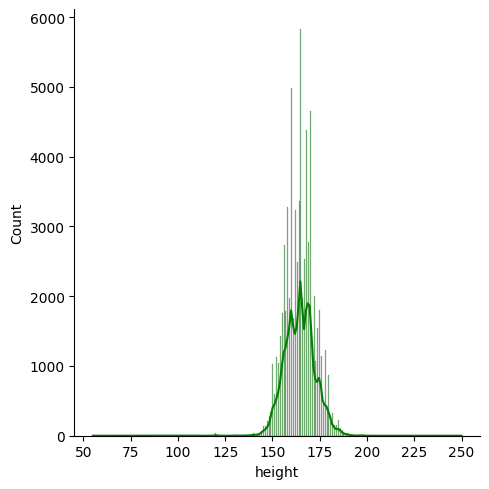

In [15]:
sns.displot(df["height"], kde=True, color="green"); # type: ignore 

Height distribution by genders looks better and I will refrain from tuning it further for the time being.

{'Women': (143.5, 179.5), 'Men': (150.0, 190.0)}

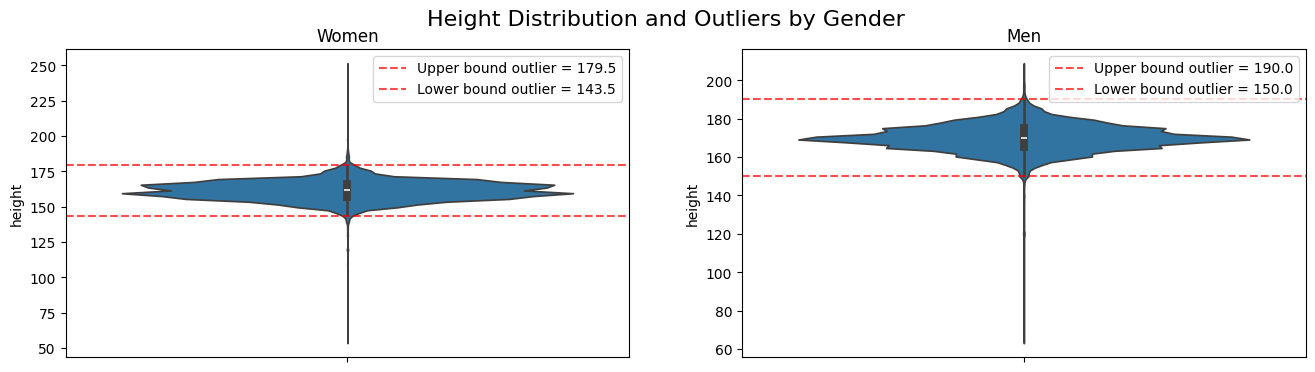

In [16]:
outliers = {"Women": calc_outliers(df[df["gender"] == 1]["height"]), "Men": calc_outliers(df[df["gender"] == 2]["height"])}
violin_outliers_gender(outliers, df, "height")

In [17]:
pre = len(df)

# drop the values of women outside outliers
wom = df[(df["gender"] == 1) & ((df["height"] < outliers["Women"][0]) | (df["height"] > outliers["Women"][1]))].index
df = df.drop(wom, axis = 0) # axis = 0 for rows

# drop the values of men outside outliers
men = df[(df["gender"] == 2) & ((df["height"] < outliers["Men"][0] ) | (df["height"] > outliers["Men"][1]))].index
df.drop(men, axis = 0)

print(f"Dropped {pre - len(df)} rows")

Dropped 457 rows


### 1.1 g)

&nbsp; Q: What is the ratio of women vs men with positive cardiovascular disease?

&nbsp; A: 

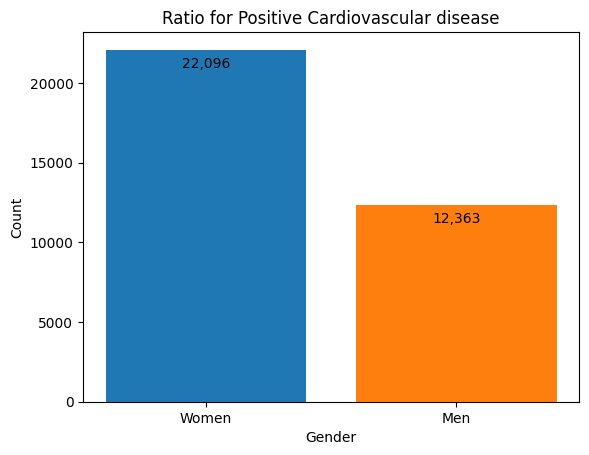

In [18]:
genders = {"Women": 1, "Men": 2}

fig, ax = plt.subplots()

# loop through the genders and plot the count of positive cardiovascular disease
for i in genders: # filtering gender = gender and cardio = True ie. 1
    filter = len(df[(df["gender"] == genders[i]) & (df["cardio"] == 1)])
    plt.bar(x = i, height = filter)
    
# format the bar chart
for p in ax.containers:
    ax.bar_label(p, labels = [f"{val:,.0f}" for val in p.datavalues], padding = -15)
    
ax.set(title = "Ratio for Positive Cardiovascular disease", xlabel = "Gender", ylabel = "Count");


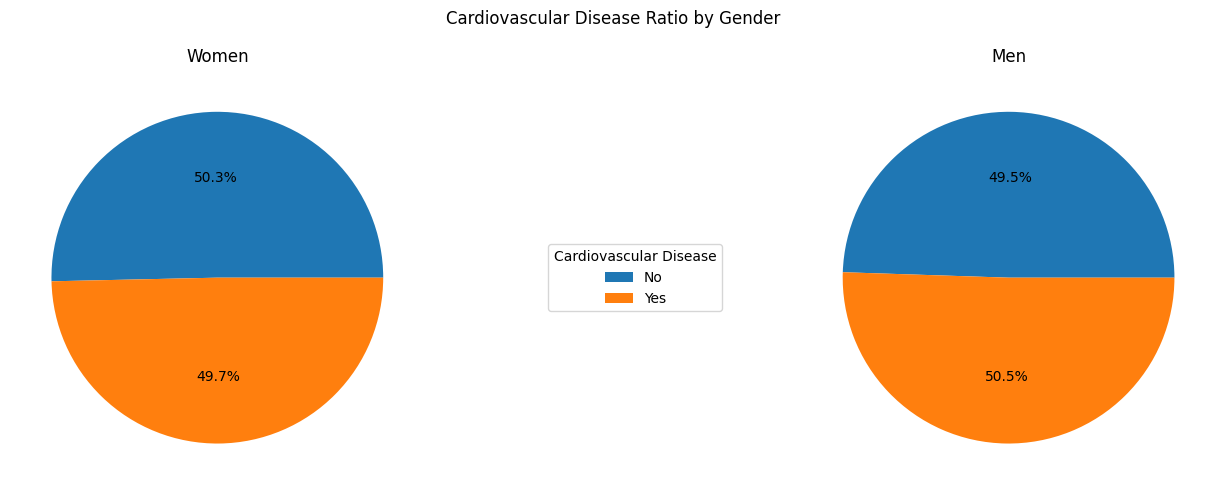

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

# loop through gender and ax
for i, ax in zip(genders, ax.flatten()):
    total = len(df[df["gender"] == genders[i]]) # total count in dataset
    disease = len(df[(df["gender"] == genders[i]) & (df["cardio"] == 1)]) # total count w/ disease
    healthy = total - disease # total count w/o disease (both)
    
    # plot gender values in current ax
    ax.pie(x = [i for i in [healthy, disease]], autopct=lambda pct: f"{pct:.1f}%")
    ax.set_title(i) # gender key set as title
    
plt.legend(["No", "Yes"], title = "Cardiovascular Disease", bbox_to_anchor = (-0.4,0.5), loc = "center") # legend for both ax
plt.suptitle("Cardiovascular Disease Ratio by Gender")
plt.tight_layout()

---
# 1.2.1 Feature Engineering - BMI

Creating a new feature, Body Mass Index (BMI), which is a measure of body fat based on height and weight. 

$BMI = \frac{weight(kg)}{height(m)^2}$

In [20]:
df["bmi"] = df["weight"] / (df["height"] / 100) ** 2
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


---
## BMI distribution of the dataset

### Classification of BMI from **WHO**:


| BMI | Nutritional status |
| --- | --- |
| <18.5 | Underweight |
| 18.5–24.9 | Normal weight |
| 25.0–29.9 | Pre-obesity |
| 30.0–34.9 | Obesity class I |
| 35.0–39.9 | Obesity class II |
| >40| Obesity class III |

source:<br>
[*WHO BMI recommendations*](https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations)

Looking at outliers in the dataset with the help of Tukey's method.<br>

$[Q_1 - k(Q_3 - Q_1), Q_3 + k(Q_3 - Q_1)] \rightarrow [Q_1 - 1.5IQR, Q_3 + 1.5IQR] $


BMI distribution and outliers divided by gender:

{'Women': (13.398375895671874, 41.3363462650954),
 'Men': (15.887468620826514, 36.93745321023563)}

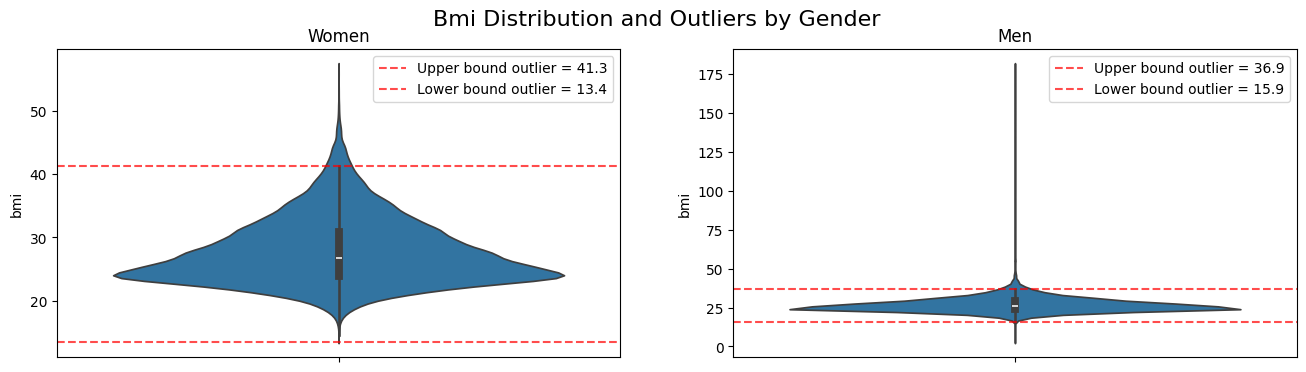

In [21]:
outliers = {"Women": calc_outliers(df[df["gender"] == 1]["bmi"]), "Men": calc_outliers(df[df["gender"] == 2]["bmi"])}
violin_outliers_gender(outliers, df, "bmi")

# evidently still remain a few extreme BMI values

In [22]:
df["bmi"].describe() # bmi of 3.47 or 180, many invalied outliers

count    68973.000000
mean        27.446743
std          5.237826
min          3.471784
25%         23.875115
50%         26.370238
75%         30.116213
max        180.678074
Name: bmi, dtype: float64

##

In the WHO BMI classifications these are the range increments:

| BMI | Nutritional status | Increment (units)|
| --- | --- | --- |
| <18.5 | Underweight | (18.5) |
| 18.5–24.9 | Normal weight | (6.4) |
| 25.0–29.9 | Pre-obesity | (4.9) |
| 30.0–34.9 | Obesity class I | (4.9) |
| 35.0–39.9 | Obesity class II | (4.9) |
| >40| Obesity class III | (0) |

For the purpose of indentifying and managing outliers in the dataset, especially concerning underweight and Obesity class III, a systematic approach based on the BMI classification steps is employed.

* **Underweight Category**: The BMI range for underweight individuals is identified as everything less than 18.5. This is very large span and it is important to note that the cutoff point for underweight is 14.35 using Tukey. In an effort to ensure that the data encompasses information relevant to underweight individuals, the cutoff point for outliers is set at **15.3**. I landed on this number by subtracting half of the Normal weight increment from the underweight cutoff point. This is done to ensure that the data is not skewed by outliers.

* **Obesity Class III**: Looking at the other BMI classes for pre-obesity through to obesity class II they increment in steps of 4.9 units. To include data pertinent to *obesity Class III* while excluding upper outliers that might distort the analysis, I apply the same step increment. This results in a cutoff point of **44.9**. 



Tuned outliers for BMI:

{'Women': (15.3, 44.9), 'Men': (15.3, 44.9)}

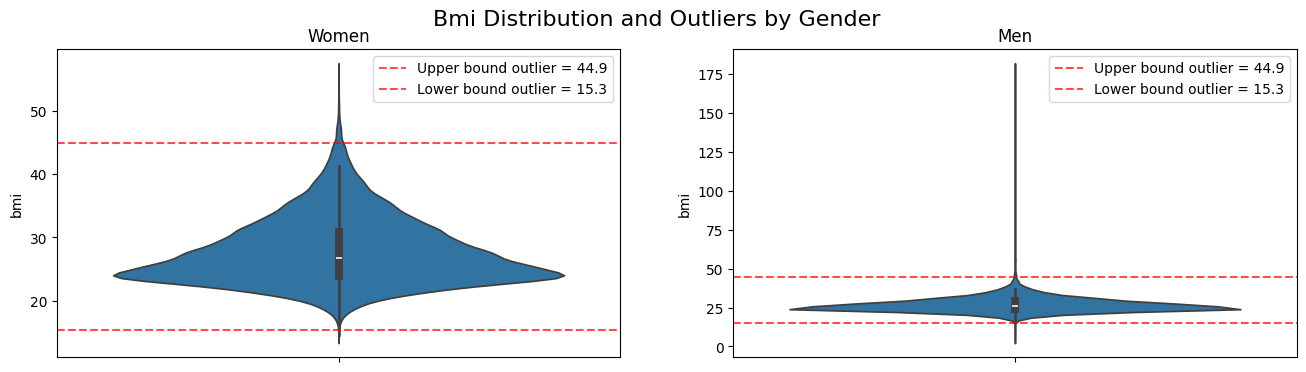

In [23]:
outliers = {"Women": (15.3, 44.9), "Men": (15.3, 44.9)}
violin_outliers_gender(outliers, df, "bmi")

I'm still not happy with the cutoff points. Particularly for the underweight category. I will try to tune the cutoff points further.

{'Women': (17, 45), 'Men': (17, 41)}

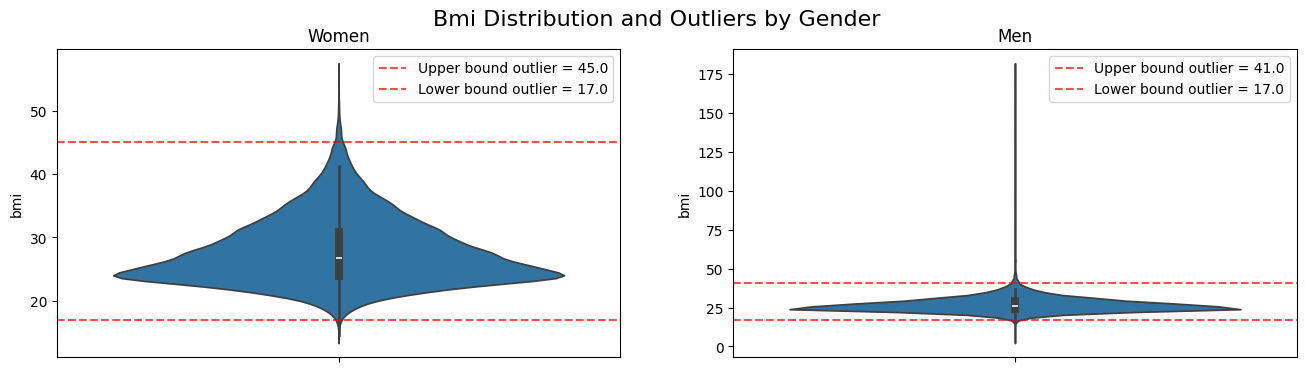

In [24]:
outliers = {"Women": (17, 45), "Men": (17, 41)}
violin_outliers_gender(outliers, df, "bmi")

---
### 1.2.1 a) Removing BMI Outliers

Removing outliers based on the tuned cutoff points for BMI.

In [25]:
pre = len(df)

# drop the values of women outside outliers
# .index returns the index of the rows that meet the condition
wom = df[(df["gender"] == 1) & ( (df["bmi"] < 17) | (df["bmi"] > 45) )].index
df = df.drop(wom, axis = 0) # axis = 0 for rows

# drop the values of men outside outliers
men = df[(df["gender"] == 2) & ( (df["bmi"] < 17) | (df["bmi"] > 41) )].index 
df.drop(men, axis = 0)

print(f"Dropped {pre - len(df)} rows")

Dropped 223 rows


---
### 1.2.1 b) Categorical BMI-feature
---
Categories should consist of the following:

| BMI | Underweight | Normal Range | Overweight | Obese (Class I) | Obese (Class II) | Obese (Class III) |  
| --- | --- | --- | --- | --- | --- | --- |
| Range | <18.5 | 18.5-24.9 | 25.0-29.9 | 30.0-34.9 | 35.0-39.9 | >40 |
| Category | 0 | 1 | 2 | 3 | 4 | 5 |


In [26]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


In [27]:
"""
bin_cutoff = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float("inf")] #, 45

# cut BMI based on bin cutoff, label according to the index of the bin_cutoff
df["bmi_category"] = pd.cut(df["bmi"], bins = bin_cutoff, labels=[i for i in range(len(bin_cutoff) - 1)], right=False)
df["bmi_category"].value_counts()

bin_ranges = ["f{bin_cutoff[i]} - {bin_cutoff[i + 1]}" for i in range(len(bin_cutoff) - 1)]
bin_ranges[-1] = f"{bin_cutoff[-2]}+"

bmi_labels_with_ranges = [f"{label}\n({range})" for label, range in zip(bmi_labels, bin_ranges)]

# categories look good. Now I will plot the distribution of BMI categories
df.head()"""

'\nbin_cutoff = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float("inf")] #, 45\n\n# cut BMI based on bin cutoff, label according to the index of the bin_cutoff\ndf["bmi_category"] = pd.cut(df["bmi"], bins = bin_cutoff, labels=[i for i in range(len(bin_cutoff) - 1)], right=False)\ndf["bmi_category"].value_counts()\n\nbin_ranges = ["f{bin_cutoff[i]} - {bin_cutoff[i + 1]}" for i in range(len(bin_cutoff) - 1)]\nbin_ranges[-1] = f"{bin_cutoff[-2]}+"\n\nbmi_labels_with_ranges = [f"{label}\n({range})" for label, range in zip(bmi_labels, bin_ranges)]\n\n# categories look good. Now I will plot the distribution of BMI categories\ndf.head()'

In [28]:
#df["bmi_category"].value_counts()
#df["bmi_category"].describe()

### BMI Category Distribution

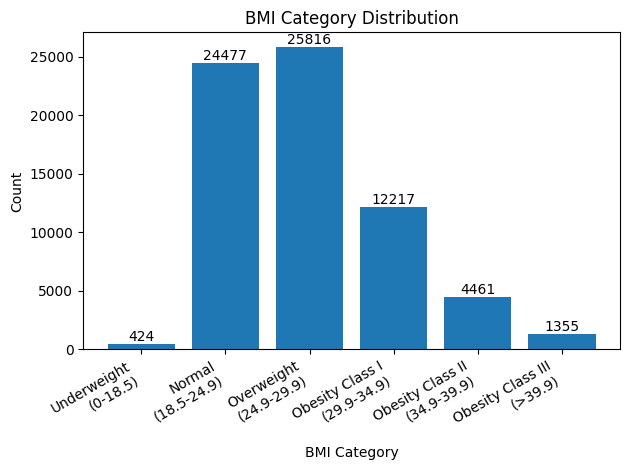

In [29]:
df['bmi_category'] = pd.cut(df['bmi'],
                            bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                            labels=[0, 1, 2, 3, 4, 5],
                            right=False)

# Count the occurrences of each category, ensuring they're sorted by the category index
category_counts = df['bmi_category'].value_counts().sort_index()

# Define the bin cutoffs and labels
bin_cutoff = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obesity Class I", "Obesity Class II", "Obesity Class III"]

# Create bin range labels
bin_ranges = [f"{bin_cutoff[i]}-{bin_cutoff[i+1]}" for i in range(len(bin_cutoff)-1)]
bin_ranges[-1] = f">{bin_cutoff[-2]}"  # Adjust the last bin range

# Combine bmi_labels with bin_ranges for x-ticks
bmi_labels_with_ranges = [f"{label}\n({range})" for label, range in zip(bmi_labels, bin_ranges)]

# Plot the bar chart
fig, ax = plt.subplots()

# Convert index to list for x-values to ensure alignment
x_values = list(category_counts.index.map(str))  # Ensuring x-values align with sorted index

# Use the numerical index for x, and category_counts.values for heights
plt.bar(x = x_values, height = category_counts.values)

# Define the x-tick labels with the range information
plt.xticks(ticks=x_values, labels=bmi_labels_with_ranges, rotation=30, ha="right")

# Show the values on top of the bars
for i, value in enumerate(category_counts.values):
    ax.text(i, value, str(value), ha='center', va='bottom')

# Set title and labels for axes
ax.set(title="BMI Category Distribution", xlabel="BMI Category", ylabel="Count")
plt.tight_layout()  # Adjust layout
plt.show()

In [30]:
""" fig, ax = plt.subplots()

bin_cutoff = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float("inf")] #, 45

# cut BMI based on bin cutoff, label according to the index of the bin_cutoff
df["bmi_category"] = pd.cut(df["bmi"], bins = bin_cutoff, labels=[i for i in range(len(bin_cutoff) - 1)], right=False)
df["bmi_category"].value_counts()

bin_ranges = ["f{bin_cutoff[i]} - {bin_cutoff[i + 1]}" for i in range(len(bin_cutoff) - 1)]
bin_ranges[-1] = f"{bin_cutoff[-2]}+"






# get the count of each category
category_counts = df["bmi_category"].value_counts().sort_index()

# plot the count of each category
plt.bar(x = category_counts.index, height = category_counts.values.tolist())
print(category_counts)
print(category_counts.index)
print(category_counts.values.tolist())

# label the bars
bmi_labels = ["Underweight", "Normal", "Overweight", "Obesity Class I", "Obesity Class II", "Obesity Class III"]
bmi_labels_with_ranges = [f"{label}\n({range})" for label, range in zip(bmi_labels, bin_ranges)]

# set the labels and rotate them for better readability (ha = horizontal alignment)
plt.xticks(ticks=range(len(bmi_labels)), labels = bmi_labels, rotation=30, ha="right");

# show the values on top of the bars
for container in ax.containers:
    ax.bar_label(container, padding = 0)

# set title and more labels
ax.set(title = "BMI Category Distribution", xlabel = "BMI Category", ylabel = "Count");
plt.tight_layout()
plt.show()
"""

' fig, ax = plt.subplots()\n\nbin_cutoff = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float("inf")] #, 45\n\n# cut BMI based on bin cutoff, label according to the index of the bin_cutoff\ndf["bmi_category"] = pd.cut(df["bmi"], bins = bin_cutoff, labels=[i for i in range(len(bin_cutoff) - 1)], right=False)\ndf["bmi_category"].value_counts()\n\nbin_ranges = ["f{bin_cutoff[i]} - {bin_cutoff[i + 1]}" for i in range(len(bin_cutoff) - 1)]\nbin_ranges[-1] = f"{bin_cutoff[-2]}+"\n\n\n\n\n\n\n# get the count of each category\ncategory_counts = df["bmi_category"].value_counts().sort_index()\n\n# plot the count of each category\nplt.bar(x = category_counts.index, height = category_counts.values.tolist())\nprint(category_counts)\nprint(category_counts.index)\nprint(category_counts.values.tolist())\n\n# label the bars\nbmi_labels = ["Underweight", "Normal", "Overweight", "Obesity Class I", "Obesity Class II", "Obesity Class III"]\nbmi_labels_with_ranges = [f"{label}\n({range})" for label, range in zip(bmi_l

---
### 1.2.1 Blood Pressure Feature Engineering

|Blood Pressure  | Systolic BP | Diastolic BP | Category
--- | --- | --- | --- |
 *Blood Pressure readings in:* **mm Hg** | ap_hi | ap_lo | |
Healthy | less than 120 | and less than 80 | 0
Elevated | 120-129 | and less than 80 | 1
Stage 1 hypertension | 130-139 | or 80-89 | 2 
Stage 2 hypertension | 140 or higher | or 90 or higher | 3 
Stage 3, **Hypertension crisis** | **over 180** | **or over 120** | 4 

source:<br>
[Healthline: Blood Pressure Ranges](https://www.healthline.com/health/high-blood-pressure-hypertension#definition)

#### 1.2.1 a) Blood Pressure Feature Engineering

Refining the dataset by excluding extreme outliers related to blood pressure measurement can enhance the quality and accuracy of the analysis. The benchmarks for a healthy blood pressure are recognized as 120/80 mm Hg.  

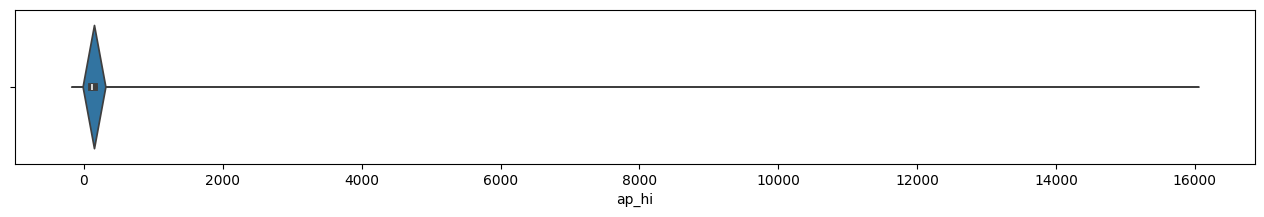

In [31]:
plt.subplots(figsize = (16, 2))
sns.violinplot(x = df["ap_hi"]);

#### Removing extreme BP outliers to get a more accurate representation of the data.

In [32]:
print(df["ap_hi"].min(), df["ap_hi"].max())
print(df["ap_lo"].min(), df["ap_lo"].max())

-150 16020
-70 11000


In [33]:
""" pre = len(df)

df = df[df["ap_hi"].between(45, 360)]
df = df[df["ap_lo"].between(30, 240)]

print(f"Dropped {pre - len(df)} rows")
"""

' pre = len(df)\n\ndf = df[df["ap_hi"].between(45, 360)]\ndf = df[df["ap_lo"].between(30, 240)]\n\nprint(f"Dropped {pre - len(df)} rows")\n'

### Plotting the Blood Pressure distribution

Calculate the outliers for the Blood Pressure columns (ap_hi, ap_lo) using Tukey's method.



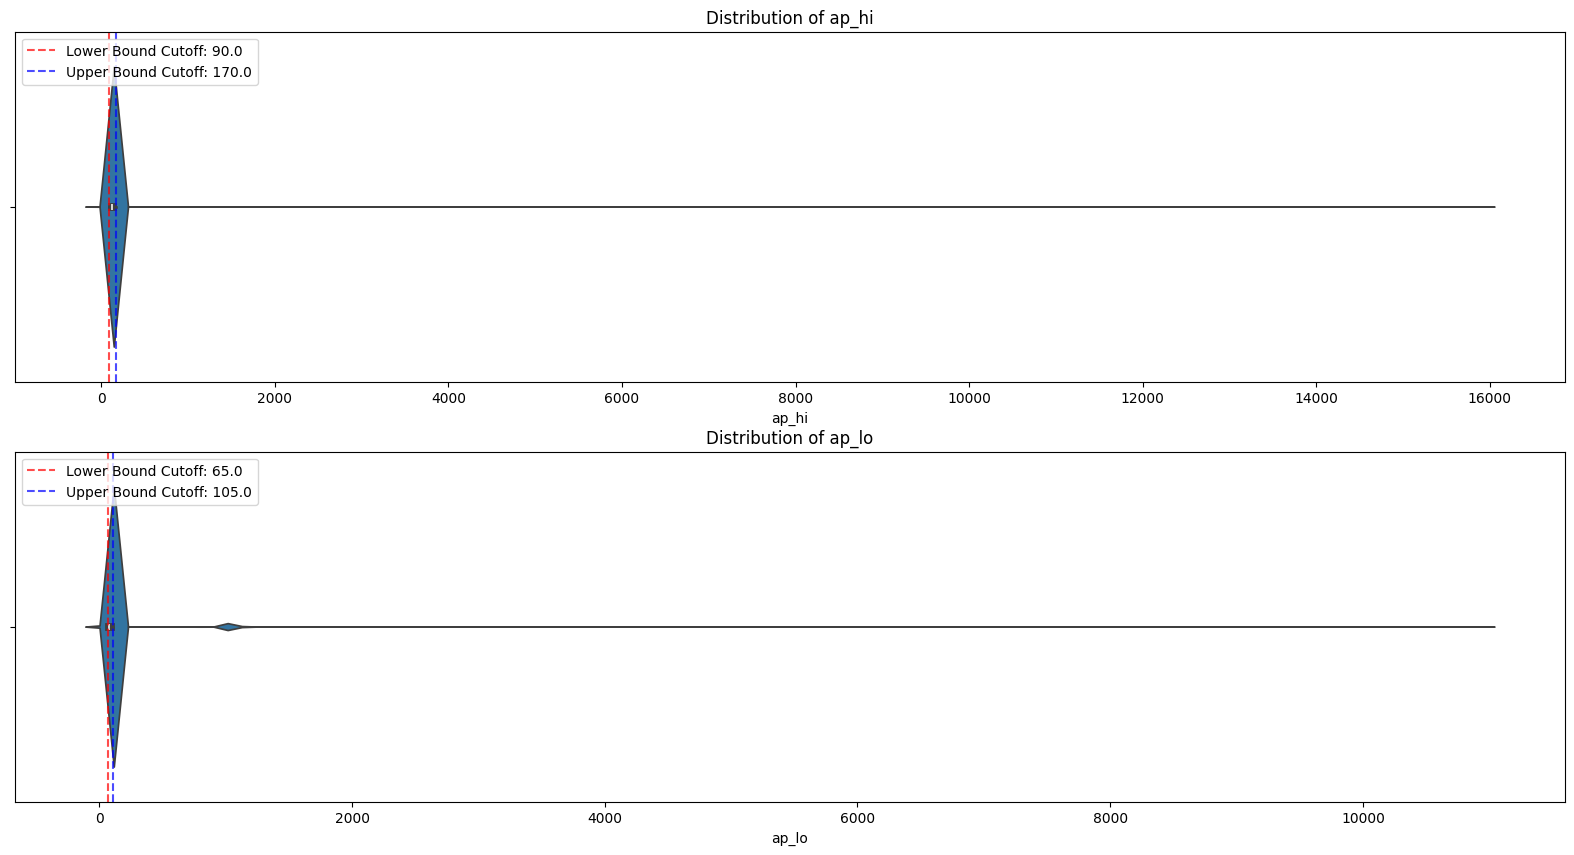

In [34]:
outliers = {"ap_hi": calc_outliers(df["ap_hi"]), "ap_lo": calc_outliers(df["ap_lo"])}

fig, axes = plt.subplots(2, 1, figsize = (20, 10))

#
for ax, key in zip(axes.flatten(), outliers):
    sns.violinplot(x = df[key], ax = ax)
    ax.set(title = f"Distribution of {key}")
    
    ax.axvline(outliers[key][0], color = "red", linestyle = "--", alpha = 0.7, label = f"Lower Bound Cutoff: {outliers[key][0]}")
    ax.axvline(outliers[key][1], color = "blue", linestyle = "--", alpha = 0.7, label = f"Upper Bound Cutoff: {outliers[key][1]}")
    ax.legend(loc = "upper left")

From what I can find you have hypotension if your blood pressure is consistently below 90/60 mm Hg. In this case our cutoff points will already exclude those individuals. 

Reading up on blood pressure there is varying opinions on what the cutoff points should be for the different stages of hypertension. Since we were guided by the Healthline article in the beginning of this section (also lab instructions) and it does not mention hypotension.

I will clean the data based on nearest category of Tukey's calculated cutoff points.

I will also remove any measurements where diastolic is higher than systolic, as this is not possible.



In [35]:
pre = len(df)

df = df[df['ap_hi'] > 90]
df = df[df['ap_hi'] < 200]

print(f"Datapoints removed: {pre - len(df)}")

Datapoints removed: 15292


In [ ]:
pre = len(df)

df = df[df["ap_hi"] > df["ap_lo"]]

print(f"Datapoints removed: {pre - len(df)}")

### Categories:

|Blood Pressure  | Systolic BP | Diastolic BP | Category
--- | --- | --- | --- |
 *Blood Pressure readings in:* **mm Hg** | ap_hi | ap_lo | |
Healthy | less than 120 | and less than 80 | 0
Elevated | 120-129 | and less than 80 | 1
Stage 1 hypertension | 130-139 | or 80-89 | 2 
Stage 2 hypertension | 140 or higher | or 90 or higher | 3 
Stage 3, **Hypertension crisis** | **over 180** | **or over 120** | 4 

In [ ]:
conditions = [
    (df["ap_hi"] < 120) & (df["ap_lo"] < 80), # healthy blood pressure category 0 
    (df["ap_hi"] >= 120) & (df["ap_hi"] < 130) & (df["ap_lo"] < 80), # elevated blood pressure category 1
    (df["ap_hi"] >= 130) & (df["ap_hi"] < 140) | (df["ap_lo"] >= 80) & (df["ap_lo"] < 90), # hypertension stage 1 category 2
    (df["ap_hi"] >= 140) | (df["ap_lo"] >= 90) # hypertension stage 2 category 3
] # this leaves out Stage 3 which has been cut off

labels = [0, 1, 2, 3]

# create a new column for blood pressure category
df["bp_category"] = np.select(conditions, labels, 4) # 4 for unknown category
df["bp_category"].value_counts().sort_index()